# Deep Learning for NLP

Goals:
- Understand basics overview of Deep Learning.
- Understand basics of LSTM and RNN
- Use LSTM to generate text from source corpus
- Create QA Chat Bots with Python

## Introduction to the Preceptron

The biological neuron:

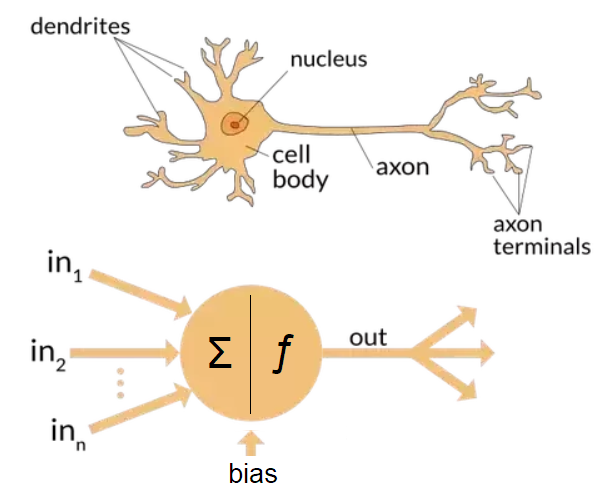

Bilogical neuron works in the simplified way in the following manner. You have dendrites that fit into the body of the cell. An electrical signal gets passed through these dendrites to the body of the cell, and then later on a single output or single electrical signal is passed on through an axon to later on connect to some other neuron.

Artificial neuron also has inputs and outputs. So we're going to attempt to mimic the biological neuron. So this simplified model called precepteron. In this case it have multiple inputs. So we have 3 inputs and 1 output and we start indexing at zero. So we have inputs of 1 through n ($in_{1}, in_{2},...,in_{n}$). Inputs may have various features. For instance, how many rooms the house has or how dar an image is represented by some sort of pixels amount. So the next step is that those inputs get multiplied by vertain weight. And typically the weights are initialized randomly at the start. After that these inputs are going to be multiplied by the weights. The next step is to take these results, the inputs multiplited by their respective weights and pass them into activation function. There are many activation functions to choose from, this will be covered later. In this case we can imagine that it is something like "if the sum of inputs is positive return 1, if sum is negative output 0".

There's a possible issue here and it is the following: what if the original inputs started off as zero? Then any weight that were chosen multiplied by the input would still result in zero. This is fixed by adding in a bias term. 

So mathematically this precepteron model looks as following:
<br></br>
<center>$\sum_{i=0}^{n}w_{i}x_{i} + b$</center>
<br></br>
Where $n$ is number of input, $w_{i}$ is a specific weight for the input multiplied by $x_{i}$ which is an input itself, plus a bias term $b$.

## Introduction to Neural Networks

We've seen how a single preceptron behaves, now it's time to expand this concept to the idea of a neural network.

Multiple Preceptrons Network:

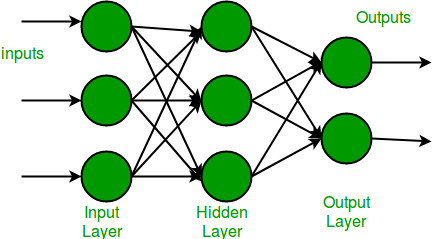

Here we can see multiple layers of preceptrons connected to each other through their inputs and outputs. In this case we have input layer on the left, 1 hidden layer and 1 output layer. The hidden layer is the one which is between the input layer and the output layer. Essentially, hidden layers are the layerrs that don't get to see the outside, that is all the way inputs on the left or outputs on the right.

Input layers are real values from the data. Hidden layers in between input and output. 3 or more layers indicate "deep network". Output layer is a final estimate for the output.

As you go forward through more layers, the level of abstraction increases. Let's now discuss activation functions in more detail.

### Activation Function

Previously in this text out  activation function was just simple function that output 0 or 1.

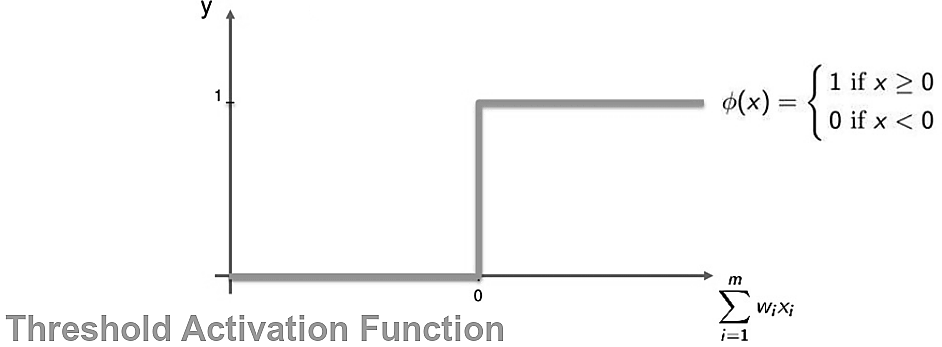

We were having sum of the weighted inputs. If it's positive then function outputs 1 otherwise 0. It is a pretty dramatic function, since small changes aren't reflected. You can have small changes like 0.8 or 0.6 it will still output 1. It would be nice if we could have more dinamic function like sigmoid.

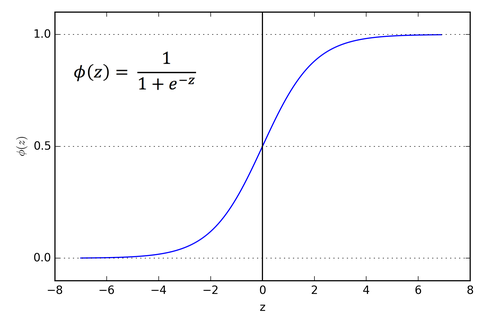

Changing the activation fucntion used can be beneficial depending on the task. There are multiple activation functions that are in use.

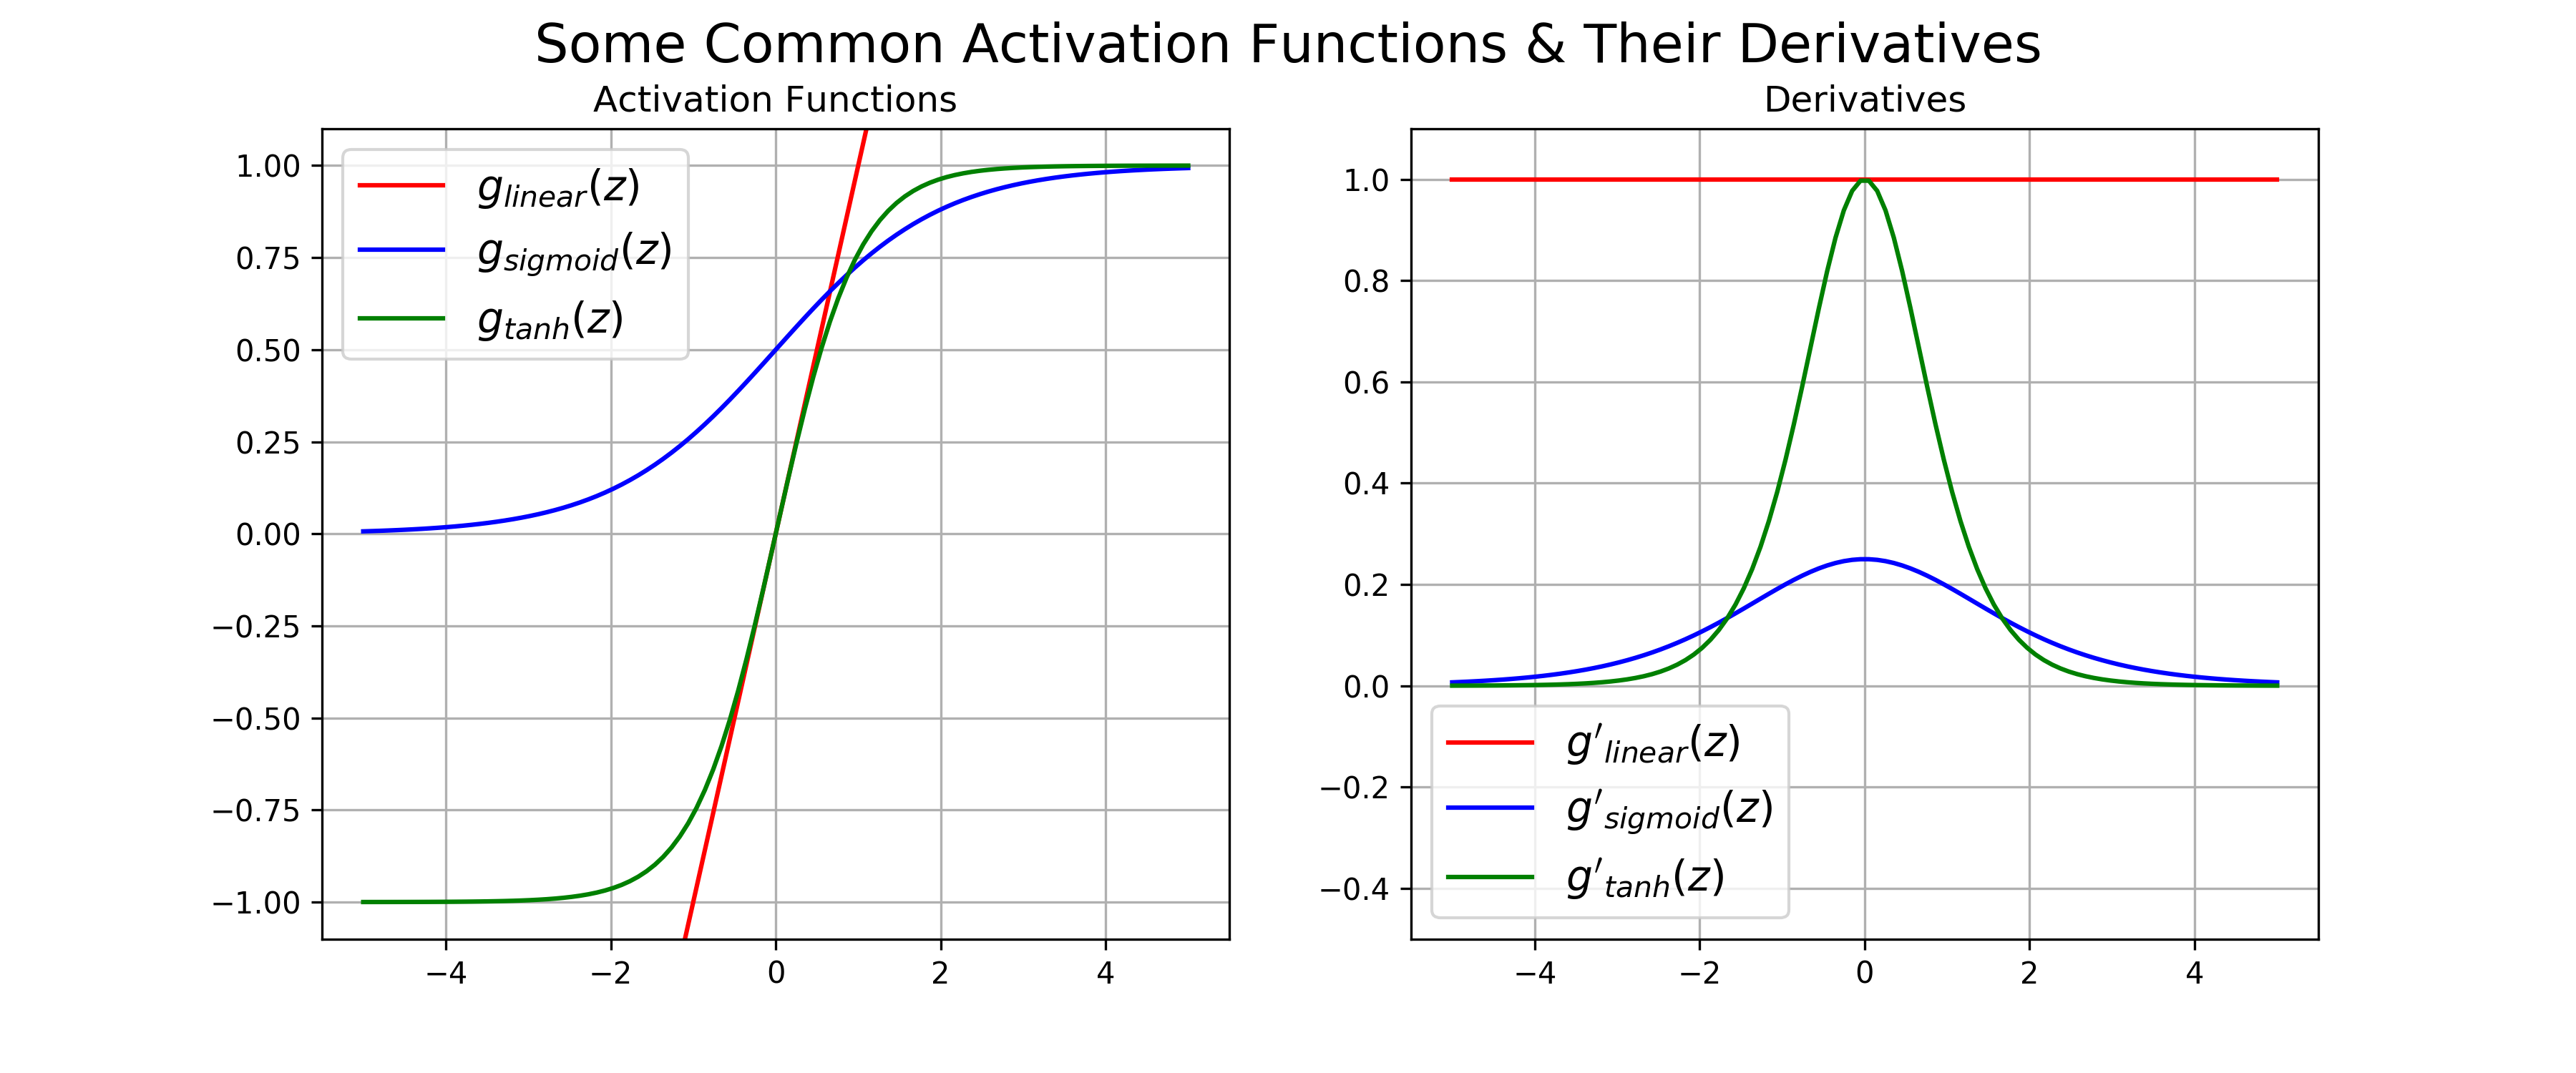

The most common activation function is Rectified Linear Unit (ReLU): THis is actually a relatively simple function: $max(0, u)$.

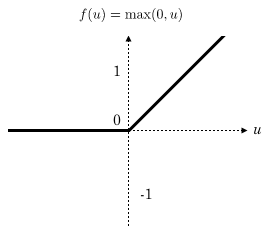

The $u$ if it's negative, the funcion will always return 0. As soon as $u$ get's positive it will always return value of $u$. ReLu tends to have the best performance in many situations. Deep Learning libraries have these built in for us, so we don't need to worry about implementation.

Let's learn how to create a very simple neural network for calssifying the famous ioris dataset. The iris dataset contains measurement of flower petals and sepals and has corresponding labels to one of three classes (3 flower species).

In [3]:
import numpy as np
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

In [4]:
iris = load_iris()

If we take a lot at whjat type of object that is. It is a specialized bunch object from `scikit-learn`.

In [5]:
type(iris)

sklearn.utils.Bunch

Let's print out the description.

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Let's grab a feature information and a label information.

In [7]:
X = iris.data

In [24]:
X.shape

(150, 4)

In [8]:
y = iris.target

The way how `Keras` and Neural Network works we need to convert that to categorical variable.

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# class 0 --> [1,0,0]
# class 1 --> [0,1,0]
# class 2 --> [0,0,1]

We can do that by using `to_categorical` from `keras`.

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y = to_categorical(y)

So now we have 3 veriables per label.

In [14]:
y.shape

(150, 3)

## Splitting the data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

For Neural Networks it is usuallyu a good idea to scale or standardize you data. 

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler_object = MinMaxScaler()

I won't fit it for all the data because that would be essentially cheating. We don't want to assume prior knowledge of the test data.

In [20]:
scaler_object.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_X_train = scaler_object.transform(X_train)

In [22]:
scaled_X_test = scaler_object.transform(X_test)

## Creating Neural Network

Right now, let's build a network.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

So we create `Sequential` model and add layers to that model. As for the `units` or number of neuronse it is usually double the features. There's no correct or incorrect answer. Often people have some sort of domain knowledge that helps them understand what's a good choice for neuron number. It should be something based of number of features, like some multiple of the features.

For the output we use layer of 3 neuronse. Neuron is going to have what looks like probability for belonging in any particular class, which is why we want hot encoded.

Since we're checking the belonging of an entry to a certain class we choose the loss function as `categorical_crossentropy`.

In [25]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Let's check summary of the model.

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(scaled_X_train, y_train, epochs=150, verbose=2)

Epoch 1/150
4/4 - 0s - loss: 1.0219 - accuracy: 0.3300 - 362ms/epoch - 91ms/step
Epoch 2/150
4/4 - 0s - loss: 1.0133 - accuracy: 0.3400 - 7ms/epoch - 2ms/step
Epoch 3/150
4/4 - 0s - loss: 1.0065 - accuracy: 0.3400 - 5ms/epoch - 1ms/step
Epoch 4/150
4/4 - 0s - loss: 1.0005 - accuracy: 0.3400 - 4ms/epoch - 1000us/step
Epoch 5/150
4/4 - 0s - loss: 0.9944 - accuracy: 0.3400 - 6ms/epoch - 2ms/step
Epoch 6/150
4/4 - 0s - loss: 0.9889 - accuracy: 0.3600 - 5ms/epoch - 1ms/step
Epoch 7/150
4/4 - 0s - loss: 0.9834 - accuracy: 0.3600 - 3ms/epoch - 750us/step
Epoch 8/150
4/4 - 0s - loss: 0.9781 - accuracy: 0.3600 - 6ms/epoch - 1ms/step
Epoch 9/150
4/4 - 0s - loss: 0.9725 - accuracy: 0.3600 - 5ms/epoch - 1ms/step
Epoch 10/150
4/4 - 0s - loss: 0.9674 - accuracy: 0.3800 - 4ms/epoch - 1ms/step
Epoch 11/150
4/4 - 0s - loss: 0.9622 - accuracy: 0.3800 - 6ms/epoch - 2ms/step
Epoch 12/150
4/4 - 0s - loss: 0.9570 - accuracy: 0.4000 - 5ms/epoch - 1ms/step
Epoch 13/150
4/4 - 0s - loss: 0.9514 - accuracy: 0.45

Epoch 104/150
4/4 - 0s - loss: 0.4344 - accuracy: 0.9200 - 3ms/epoch - 750us/step
Epoch 105/150
4/4 - 0s - loss: 0.4314 - accuracy: 0.9100 - 5ms/epoch - 1ms/step
Epoch 106/150
4/4 - 0s - loss: 0.4289 - accuracy: 0.9200 - 4ms/epoch - 1ms/step
Epoch 107/150
4/4 - 0s - loss: 0.4252 - accuracy: 0.9100 - 4ms/epoch - 878us/step
Epoch 108/150
4/4 - 0s - loss: 0.4202 - accuracy: 0.9200 - 4ms/epoch - 997us/step
Epoch 109/150
4/4 - 0s - loss: 0.4169 - accuracy: 0.9200 - 5ms/epoch - 1ms/step
Epoch 110/150
4/4 - 0s - loss: 0.4126 - accuracy: 0.9300 - 4ms/epoch - 1ms/step
Epoch 111/150
4/4 - 0s - loss: 0.4105 - accuracy: 0.9500 - 4ms/epoch - 878us/step
Epoch 112/150
4/4 - 0s - loss: 0.4085 - accuracy: 0.9600 - 4ms/epoch - 999us/step
Epoch 113/150
4/4 - 0s - loss: 0.4041 - accuracy: 0.9600 - 3ms/epoch - 767us/step
Epoch 114/150
4/4 - 0s - loss: 0.3981 - accuracy: 0.9200 - 4ms/epoch - 1ms/step
Epoch 115/150
4/4 - 0s - loss: 0.3950 - accuracy: 0.9200 - 5ms/epoch - 1ms/step
Epoch 116/150
4/4 - 0s - los

This will return probabilities.

In [30]:
model.predict(scaled_X_test)

2/2 [==============================] - 0s 2ms/step


array([[1.87429879e-02, 6.73095167e-01, 3.08161855e-01],
       [9.34132397e-01, 5.50814159e-02, 1.07861925e-02],
       [7.63391945e-05, 5.63212596e-02, 9.43602383e-01],
       [1.42266583e-02, 5.65286934e-01, 4.20486450e-01],
       [9.24769323e-03, 4.96112764e-01, 4.94639605e-01],
       [9.00749981e-01, 8.10653344e-02, 1.81846321e-02],
       [5.83752617e-02, 6.85510159e-01, 2.56114542e-01],
       [9.39240563e-04, 1.41753376e-01, 8.57307374e-01],
       [6.39692415e-03, 4.00647789e-01, 5.92955232e-01],
       [3.49017382e-02, 7.01458871e-01, 2.63639390e-01],
       [3.04282666e-03, 2.93066174e-01, 7.03891039e-01],
       [8.88010681e-01, 9.03293937e-02, 2.16599144e-02],
       [9.23195958e-01, 6.33121207e-02, 1.34918634e-02],
       [8.96909714e-01, 8.35168436e-02, 1.95734445e-02],
       [9.40294802e-01, 5.03604561e-02, 9.34477709e-03],
       [1.38645461e-02, 5.46944082e-01, 4.39191431e-01],
       [7.35218637e-04, 1.66987449e-01, 8.32277298e-01],
       [3.68178114e-02, 7.26062

This will return classes.

In [32]:
np.argmax(model.predict(scaled_X_test), axis=-1)

2/2 [==============================] - 0s 1ms/step


array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

## Model Evaluation

In [33]:
predictions = np.argmax(model.predict(scaled_X_test), axis=-1)

2/2 [==============================] - 0s 3ms/step


Let's get index positions.

In [34]:
y_test.argmax(axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

We did a very good job, only one entry was misclassified.

In [36]:
confusion_matrix(y_test.argmax(axis=1), predictions)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 16]], dtype=int64)

In [37]:
print(classification_report(y_test.argmax(axis=1), predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

   micro avg       0.98      0.98      0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [38]:
accuracy_score(y_test.argmax(axis=1), predictions)

0.98

In [39]:
model.save('sequentialmodel.h5')

We can also load model.

In [40]:
from keras.models import load_model

In [41]:
new_model = load_model('sequentialmodel.h5')

___
# Recurrent Neural Networks

Recurrent Neural Networks are specifically designed to work with sequence data such as:
- Time Series Data
- Sentences
- Audio
- Car Trajectories
- Music

We can imagine a sequence [1,2,3,4,5,6]. Would we be able to predict a similar sequence shifted one time step into the future [2,3,4,5,6,7].

In this case we would use Normal Neuron in Feed Forward Network.

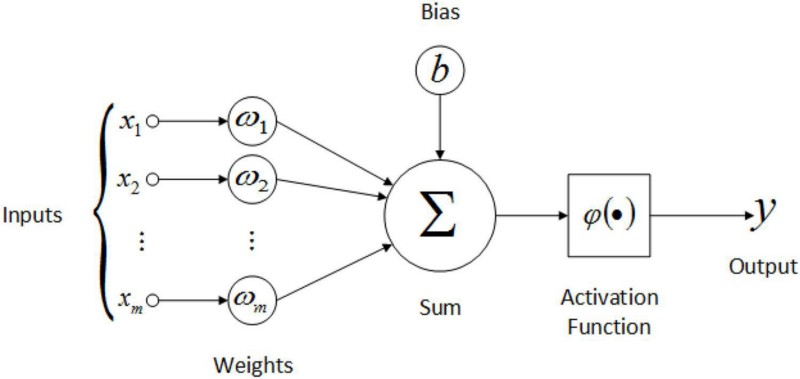

Remember that a normal neuron just takes in some input. And it could be multiple inputs, so we aggregate them. And once it aggregates those inputs, it passes it through some activation function. And then from that we have an output. And reccurent network is a bit different. It sends output back to itself. So we can actually unroll this throughout time.

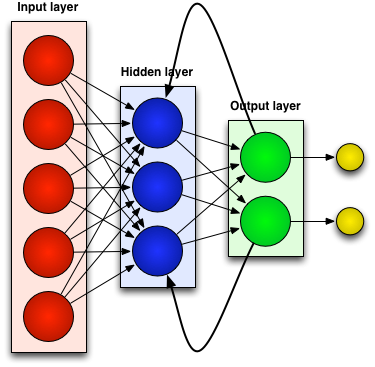

Somethig worth mentioning is that it is recieveng both inputs from a previous time step as well as inputs from the current time step.

This cells that are function of inputs from previous time steps are also known as _memory cells_. RNN are also flexible in their inputs and outputs, for both sequences and single vector values. We can also create entire layers of Recurrent Neurons.

We can do sequence input to sequence output, sequence input to vector output, vector input to sequence output.

# LSTM and GRU

An issue RNN face is that after a while network will begin to "forget" the first inputs, as information is lost at each step going through the RNN. We need some sort of "long-term memory" for our networks.

The LSTM (Long Short-Term Mermory) cell was created to help address these RNN issues. 

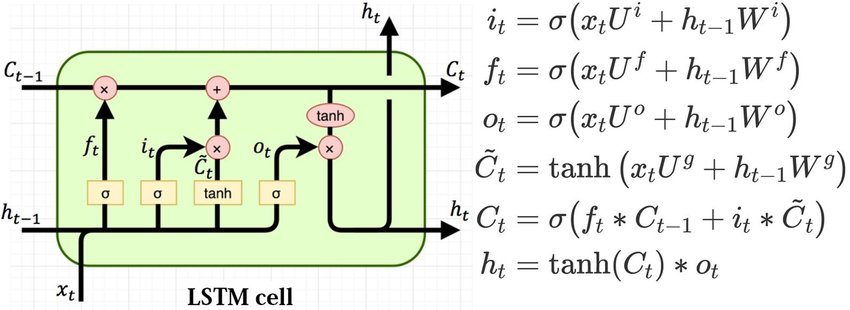

Here we can see a long short-term memory cell. Here we sill have original inputs from a normal reccurent neuron, those $h_{t-1}$ and $x_{t}$. But here we have 3rd input and we will call that the cell state $C_{t-1}$. Sop right now we're receiving the cell state at $t-1$ and then with the outputs we again output $h_{t}$ and then we also have the cell state. So that's the current state $C_{t}$. So we're going to take $h_{t-1}$ and $x_{t}$, as well as the previous cell state $C_{t-1}$ and we will output $h_{t}$ as well as the current state $C_{t}$. So we're going to do this step by step. 

So the first step is a forget gates layer $f_{t} = \sigma(W_{f}\cdot[h_{t-1},x_{t}] + b_{f})$ so on this stap we decide which information we're going to forget or throw away from the cell state. And we pass that after linear transformation with some weights and bias terms into sigmoid function. And remember, becasue it's a sigmoid layer it will output a number between 0 and 1. And 1 is going to represent to keep it, and a 0 to forget about it.

The next step is to decide what new information are you going to store in the cell state. So the first part is a sigmoid layer and the second part is a hyperbolic tangent layer.
<br></br>
$i_{t}=\sigma(W_{i}\cdot[h_{t-1},x_{t}] + b_{i})$
<br></br>
$\tilde{C}_{t} = tanh(W_{C}\cdot[h_{t-1},x_{t}] + b_{C})$
<br></br>
That sigmoid layer is called the input gate layer, $i_{t}$. So we take simoid and do a linear transformation with $W_{i}$ plus $b_{i}$ and have a buch of values between 0 and 1. Then the second part of this is hyperbolic tangent layer. So it again going to take $h_{t-1}$ and $x_{t}$, do that linear transformation and pass it through a hyperbolic tangent. So that ends up creating a vector, which is called new **candidate values** $\tilde{C}_{t}$. These are candidate values that could be added to the state. And the next step we're going to combine these two to create an update to the cell state.

So now it's time to update the old cell state $C_{t-1}$ to the new cell state $C_{t}$ so we could pass it to $t+1$ state of the cell.
<br></br>
$C_{t} = f_{t}\cdot C_{t-1} + i_{t}\cdot \tilde{C}_{t}$
<br></br>
So we end up doing is we multiply the old state $f_{t}\cdot C_{t-1}$. Then we're going to add $i_{t}$, that input gate layer, times those candidate calues $\tilde{C}_{t}$ which is $i_{t}\cdot \tilde{C}_{t}$. So these are new candidate values, and now they been scaled by how muych we decided to update each state value.

Now our final decision is going to be what do we output for $h_{t}$. So this output is going to be based off the cell state bu it's just a filtered version.
<br></br>
$o_{t} = \sigma(W_{o}\cdot[h_{t-1},x_{t}] + b_{o})$
<br></br>
$h_{t} = o_{t} \cdot tanh(C_{t})$
<br></br>
So we take this $h_{t-1}$ and $x_{t}$ doing a linear transformation on it, passing it through the sigmoid, and then once we have that output $o_{t}$, we're going to multiply it by a hyperbolic tangent of the $C_{t}$ or that current cell state and that gives us $h_{t}$.

There are variance of LSTM, one of them is called the peep hole variance. It's is popular because it adds peepholes to all the gates. It allows $f_{t}, i_{t}, o_{t}$ to see the previous cell state or $C_{t-1}$.

Another version of the LSTM is called **Gated Recurrent Unit** (GRU). It was introduced first around 2014. And what it ends up doing is it actually simplifies things a bit by combining the forget and input gates into a single update gates. And it also merges the cell state and hidden state and it makes a few other changes. 

___
# Text Generation with Keras

Targets:
- Process text
- Clean text
- Tokenize the text and create Sequnces with Keras

In [42]:
def read_file(filepath):
    with open(filepath) as f:
        str_text = f.read()
        
    return str_text

Let's load `spacy` and discard several things in order for tokenization to work faster.

In [44]:
import spacy

In [45]:
nlp = spacy.load('en', disable=['parser', 'tagger', 'ner'])

Setting up max limit higher in order for `spacy` not to hit the limit.

In [46]:
nlp.max_length = 1198623

Let's set up a function that takes in some document text as a string and then it's going to grab text tokens if they are not some particular type of punctuation or if they're not a new line.

In [47]:
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [48]:
d = read_file('moby_dick_four_chapters.txt')

Now generate tokens.

In [50]:
tokens = separate_punc(d)

In [51]:
len(tokens)

11394

Next we're going to do is create sequence of tokens. So the general idea is that we're going to pass the first 24 words of a sentence and have out network predict the 25th word. Depending on the text and on size of it this list of words can be shorter or longer.

In [53]:
train_len = 25 + 1

text_sequences = []

for i in range(train_len, len(tokens)):
    seq = tokens[i-train_len:i]
    
    text_sequences.append(seq)

In [54]:
type(text_sequences)

list

So this works as a rolling window.

In [57]:
' '.join(text_sequences[0])

'call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on'

In [58]:
' '.join(text_sequences[1])

'me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore'

In [59]:
' '.join(text_sequences[2])

'ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i'

## Preprocessing

Now let's use `Keras` tokenization to format this into numerical system that `Keras` can understand.

In [60]:
from keras.preprocessing.text import Tokenizer

In [63]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)

In [65]:
sequences = tokenizer.texts_to_sequences(text_sequences)

We replaced our original sequences of text 26-long to sequences that have numbers in place of those words. The idea is that each of these numbers is an ID for a particular word. If we want to figure out the relationship we can call `tokenizer.index_word`.

In [69]:
for i in sequences[0]:
    print(f"{i}: {tokenizer.index_word[i]}")

964: call
14: me
265: ishmael
51: some
263: years
416: ago
87: never
222: mind
129: how
111: long
962: precisely
262: having
50: little
43: or
37: no
321: money
7: in
23: my
555: purse
3: and
150: nothing
261: particular
6: to
2704: interest
14: me
24: on


We can see how often words appear in the document by using `tokenizer.word_counts`.

In [70]:
vocabulary_size = len(tokenizer.word_counts)

In [71]:
vocabulary_size

2709

In [72]:
type(sequences)

list

## Text to array convertion

Let's format `sequences` into `numpy` matrix.

In [73]:
import numpy as np

In [74]:
sequences = np.array(sequences)

Each of these rows represent a line in the text.

In [75]:
sequences

array([[ 964,   14,  265, ..., 2704,   14,   24],
       [  14,  265,   51, ...,   14,   24,  965],
       [ 265,   51,  263, ...,   24,  965,    5],
       ...,
       [ 960,   12,  168, ...,  264,   53,    2],
       [  12,  168, 2703, ...,   53,    2, 2709],
       [ 168, 2703,    3, ...,    2, 2709,   26]])

## Features - Labels split

The train test split is going to go ahead and separate first columns as features and the last column as the target we want to predict.

In [76]:
from keras.utils import to_categorical

In [77]:
sequences[:,:-1]

array([[ 964,   14,  265, ...,    6, 2704,   14],
       [  14,  265,   51, ..., 2704,   14,   24],
       [ 265,   51,  263, ...,   14,   24,  965],
       ...,
       [ 960,   12,  168, ...,   11,  264,   53],
       [  12,  168, 2703, ...,  264,   53,    2],
       [ 168, 2703,    3, ...,   53,    2, 2709]])

In [78]:
sequences[:,-1]

array([  24,  965,    5, ...,    2, 2709,   26])

In [79]:
X = sequences[:,:-1]
y = sequences[:,-1]

Now we want to change that `y` in `to_categorical`. We add `vocabulary_size`+1 because `Keras` wants additional space to hold 0.

In [80]:
y = to_categorical(y, num_classes=vocabulary_size+1)

In [81]:
seq_len = X.shape[1]

In [82]:
X.shape

(11368, 25)

## Model Creation

Now it's time to create a model.

In [83]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [86]:
def create_model(vocabulary_size, seq_len):
    
    model = Sequential()
    model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(50, activation='relu'))
    
    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    return model

In [87]:
model = create_model(vocabulary_size+1, seq_len)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 25)            67750     
                                                                 
 lstm_2 (LSTM)               (None, 25, 50)            15200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 2710)              138210    
                                                                 
Total params: 243,910
Trainable params: 243,910
Non-trainable params: 0
_________________________________________________________________


In [88]:
from pickle import dump, load

In [89]:
model.fit(X, y, batch_size=128, epochs=200, verbose=1)

Epoch 1/200
89/89 [==============================] - 4s 25ms/step - loss: 7.0403 - accuracy: 0.0372
Epoch 2/200
89/89 [==============================] - 2s 24ms/step - loss: 6.3772 - accuracy: 0.0527
Epoch 3/200
89/89 [==============================] - 2s 24ms/step - loss: 6.3478 - accuracy: 0.0527
Epoch 4/200
89/89 [==============================] - 2s 24ms/step - loss: 6.3236 - accuracy: 0.0527
Epoch 5/200
89/89 [==============================] - 2s 25ms/step - loss: 6.2146 - accuracy: 0.0527
Epoch 6/200
89/89 [==============================] - 2s 24ms/step - loss: 6.1190 - accuracy: 0.0527
Epoch 7/200
89/89 [==============================] - 2s 24ms/step - loss: 6.0012 - accuracy: 0.0544
Epoch 8/200
89/89 [==============================] - 2s 24ms/step - loss: 5.9113 - accuracy: 0.0559
Epoch 9/200
89/89 [==============================] - 2s 24ms/step - loss: 5.8528 - accuracy: 0.0610
Epoch 10/200
89/89 [==============================] - 2s 24ms/step - loss: 5.8040 - accuracy: 0.0656

89/89 [==============================] - 3s 30ms/step - loss: 3.1093 - accuracy: 0.2735
Epoch 83/200
89/89 [==============================] - 3s 29ms/step - loss: 3.0815 - accuracy: 0.2822
Epoch 84/200
89/89 [==============================] - 3s 28ms/step - loss: 3.0600 - accuracy: 0.2848
Epoch 85/200
89/89 [==============================] - 3s 28ms/step - loss: 3.0378 - accuracy: 0.2876
Epoch 86/200
89/89 [==============================] - 3s 29ms/step - loss: 3.0136 - accuracy: 0.2932
Epoch 87/200
89/89 [==============================] - 3s 29ms/step - loss: 2.9858 - accuracy: 0.2993
Epoch 88/200
89/89 [==============================] - 3s 29ms/step - loss: 2.9665 - accuracy: 0.3009
Epoch 89/200
89/89 [==============================] - 3s 30ms/step - loss: 2.9468 - accuracy: 0.3053
Epoch 90/200
89/89 [==============================] - 3s 28ms/step - loss: 2.9590 - accuracy: 0.3001
Epoch 91/200
89/89 [==============================] - 3s 29ms/step - loss: 2.9145 - accuracy: 0.3104
Epo

89/89 [==============================] - 3s 30ms/step - loss: 1.8527 - accuracy: 0.5303
Epoch 163/200
89/89 [==============================] - 3s 30ms/step - loss: 1.8124 - accuracy: 0.5417
Epoch 164/200
89/89 [==============================] - 3s 32ms/step - loss: 1.8224 - accuracy: 0.5358
Epoch 165/200
89/89 [==============================] - 3s 31ms/step - loss: 1.7881 - accuracy: 0.5469
Epoch 166/200
89/89 [==============================] - 3s 30ms/step - loss: 1.7644 - accuracy: 0.5495
Epoch 167/200
89/89 [==============================] - 3s 30ms/step - loss: 1.7549 - accuracy: 0.5518
Epoch 168/200
89/89 [==============================] - 3s 30ms/step - loss: 1.7402 - accuracy: 0.5586
Epoch 169/200
89/89 [==============================] - 3s 31ms/step - loss: 1.7284 - accuracy: 0.5624
Epoch 170/200
89/89 [==============================] - 3s 32ms/step - loss: 1.7431 - accuracy: 0.5568
Epoch 171/200
89/89 [==============================] - 3s 31ms/step - loss: 1.7190 - accuracy: 0

In [90]:
model.save('mobydick_model.h5')

Let's save the tokenizer.

In [91]:
dump(tokenizer, open('simple_tokenizer', 'wb'))

## New text generation

We're going to create a function that generates new text for us based off given model, tokenizer, sequence length, a seed text and then the number of words to be generated by the model.

In [105]:
from keras.utils import pad_sequences

In [111]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    
    output_text = []    
    input_text = seed_text
    
    for i in range(num_gen_words):
        
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        pred_word_ind = np.argmax(model.predict(pad_encoded, verbose=0), axis=-1)[0]
        
        pred_word = tokenizer.index_word[pred_word_ind]
        
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
    
    return ' '.join(output_text)

In [112]:
text_sequences[0]

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on']

In [113]:
import random 

random.seed(101)
random_pick = random.randint(0, len(text_sequences))

In [114]:
random_seed_text = text_sequences[random_pick]

In [115]:
seed_text = ' '.join(random_seed_text)

In [116]:
seed_text

'and throwing the clothes to one side he really did this in not only a civil but a really kind and charitable way i stood looking'

In [117]:
generate_text(model, tokenizer, seq_len, seed_text, num_gen_words=25)

"but a merchant sailor i should now n't keep out a tempestuous euroclydon euroclydon says or old tattooed and the tattooed knows meditation like this"